In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [3]:
df1 = pd.read_csv('observations.csv')
df1.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


In [4]:
df2 = pd.read_csv('species_info.csv')
df2.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


In [5]:
df = pd.merge(df1,df2) #merging two dataframes into one
df.head()

,scientific_name,park_name,observations,category,common_names,conservation_status
0,Vicia benghalensis,Great Smoky Mountains National Park,68,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",NaN
1,Vicia benghalensis,Yosemite National Park,148,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",NaN
2,Vicia benghalensis,Yellowstone National Park,247,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",NaN
3,Vicia benghalensis,Bryce National Park,104,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",NaN
4,Neovison vison,Great Smoky Mountains National Park,77,Mammal,American Mink,NaN


In [6]:
obs_sum = df.groupby(df['park_name']).sum().reset_index()
obs_sum.head()

,park_name,observations
0,Bryce National Park,633291
1,Great Smoky Mountains National Park,474863
2,Yellowstone National Park,1587641
3,Yosemite National Park,949452


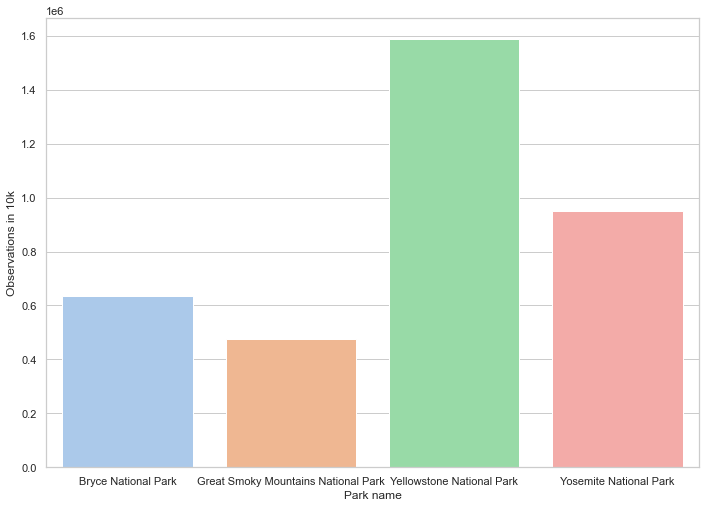

In [7]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style("whitegrid")
ax = plt.subplot()
sns.barplot(data = obs_sum, x='park_name', y='observations', palette = 'pastel')
plt.xlabel('Park name')
plt.ylabel('Observations in 10k')
plt.show()

In [8]:
obs_mean = df.groupby(df['park_name']).mean().reset_index()
obs_mean

,park_name,observations
0,Bryce National Park,98.828184
1,Great Smoky Mountains National Park,74.104713
2,Yellowstone National Park,247.759207
3,Yosemite National Park,148.166667


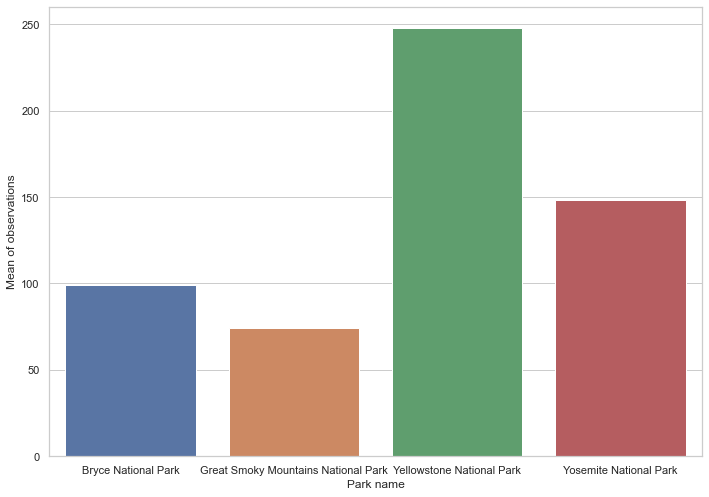

In [9]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style("whitegrid")
ax = plt.subplot()
sns.barplot(data = obs_mean, x='park_name', y='observations', palette = 'deep')
plt.xlabel('Park name')
plt.ylabel('Mean of observations')
plt.show()

In [10]:
x = df['category'].value_counts().reset_index()
x

,index,category
0,Vascular Plant,19560
1,Bird,2364
2,Nonvascular Plant,1332
3,Mammal,1200
4,Fish,524
5,Amphibian,328
6,Reptile,324


In [11]:
by_category = df.groupby(df['category']).sum().reset_index()
by_category

,category,observations
0,Amphibian,45068
1,Bird,332371
2,Fish,72901
3,Mammal,163120
4,Nonvascular Plant,190653
5,Reptile,45822
6,Vascular Plant,2795312


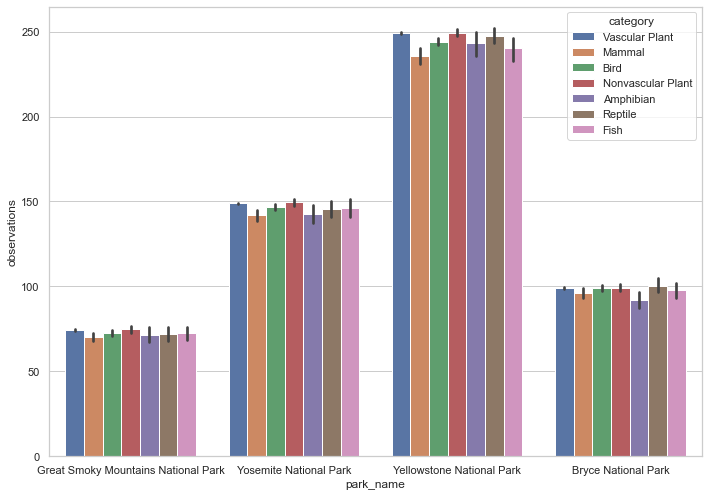

In [12]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style("whitegrid")
ax = plt.subplot()
sns.barplot(data = df, x='park_name', y='observations', hue ='category' ,palette = 'deep')
plt.show()

In [13]:
df_animals = df[(df['category']=='Mammal') |(df['category']=='Bird') | 
                (df['category']=='Amphibian') | (df['category']=='Reptile') | 
                (df['category']=='Fish') ] #creating df containing only data about animals
df_animals.head()

,scientific_name,park_name,observations,category,common_names,conservation_status
4,Neovison vison,Great Smoky Mountains National Park,77,Mammal,American Mink,NaN
5,Neovison vison,Yellowstone National Park,218,Mammal,American Mink,NaN
6,Neovison vison,Bryce National Park,91,Mammal,American Mink,NaN
7,Neovison vison,Yosemite National Park,200,Mammal,American Mink,NaN
24,Spizella pusilla,Yellowstone National Park,228,Bird,Field Sparrow,NaN


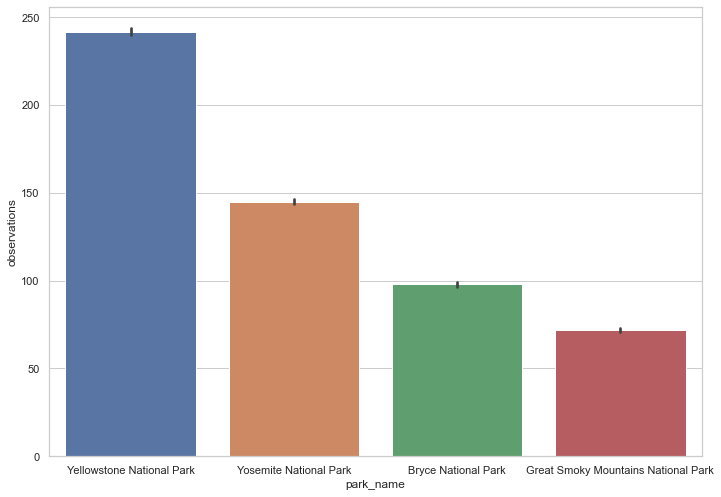

In [14]:
sns.barplot(data = df_animals, x='park_name', y='observations', palette = 'deep', 
            order = ['Yellowstone National Park','Yosemite National Park', 'Bryce National Park', 'Great Smoky Mountains National Park'])
plt.show()

In [36]:
df_animals_yellowstone = df_animals[df_animals.park_name == 'Yellowstone National Park'].sort_values(by='observations', ascending = False)
df_animals_yellowstone.head()

,scientific_name,park_name,observations,category,common_names,conservation_status
22194,Chrysemys picta bellii,Yellowstone National Park,307,Reptile,Western Painted Turtle,NaN
2484,Spinus lawrencei,Yellowstone National Park,305,Bird,Lawrence's Goldfinch,NaN
16446,Aythya americana,Yellowstone National Park,304,Bird,Redhead,NaN
20629,Ambystoma opacum,Yellowstone National Park,301,Amphibian,Marbled Salamander,NaN
6085,Perdix perdix,Yellowstone National Park,300,Bird,"Gray Partridge, Grey Partridge",NaN


In [37]:
df_animals_yosemite = df_animals[df_animals.park_name == 'Yosemite National Park'].sort_values(by='observations', ascending = False)
df_animals_yosemite.head()

,scientific_name,park_name,observations,category,common_names,conservation_status
12450,Calidris canutus,Yosemite National Park,207,Bird,Red Knot,NaN
8405,Hypsiglena torquata nuchalata,Yosemite National Park,204,Reptile,California Nightsnake,NaN
24810,Cervus elaphus,Yosemite National Park,203,Mammal,Wapiti Or Elk,NaN
24811,Cervus elaphus,Yosemite National Park,203,Mammal,Rocky Mountain Elk,NaN
16693,Etheostoma blennioides,Yosemite National Park,203,Fish,Greenside Darter,NaN


In [38]:
df_animals_bryce = df_animals[df_animals.park_name == 'Bryce National Park'].sort_values(by='observations', ascending = False)
df_animals_bryce.head()

,scientific_name,park_name,observations,category,common_names,conservation_status
20716,Martes americana,Bryce National Park,167,Mammal,Pine Marten,NaN
20717,Martes americana,Bryce National Park,167,Mammal,"American Marten, Marten",NaN
19010,Bubulcus ibis,Bryce National Park,164,Bird,"Cattle Egret, Western Cattle Egret",NaN
13167,Nyctanassa violacea,Bryce National Park,160,Bird,Yellow-Crowned Night-Heron,NaN
18528,Certhia familiaris,Bryce National Park,158,Bird,Eurasian Treecreeper,NaN


In [39]:
df_animals_gsm = df_animals[df_animals.park_name == 'Great Smoky Mountains National Park'].sort_values(by='observations', ascending = False)
df_animals_gsm.head()

,scientific_name,park_name,observations,category,common_names,conservation_status
15374,Branta hutchinsii,Great Smoky Mountains National Park,139,Bird,Cackling Goose,NaN
22885,Lepomis gibbosus,Great Smoky Mountains National Park,133,Fish,Pumpkinseed,NaN
4040,Notropis rubricroceus,Great Smoky Mountains National Park,131,Fish,Saffron Shiner,NaN
3735,Lasiurus borealis,Great Smoky Mountains National Park,127,Mammal,"Eastern Red Bat, Red Bat",NaN
8381,Poecile rufescens,Great Smoky Mountains National Park,126,Bird,Chestnut-Backed Chickadee,NaN


In [16]:
df_plants = df[(df['category']=='Vascular Plant') | 
               (df['category']=='Nonvascular PLant')] #creating df containg only data about plants
df_plants.head()

,scientific_name,park_name,observations,category,common_names,conservation_status
0,Vicia benghalensis,Great Smoky Mountains National Park,68,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",NaN
1,Vicia benghalensis,Yosemite National Park,148,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",NaN
2,Vicia benghalensis,Yellowstone National Park,247,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",NaN
3,Vicia benghalensis,Bryce National Park,104,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",NaN
8,Prunus subcordata,Yosemite National Park,138,Vascular Plant,Klamath Plum,NaN


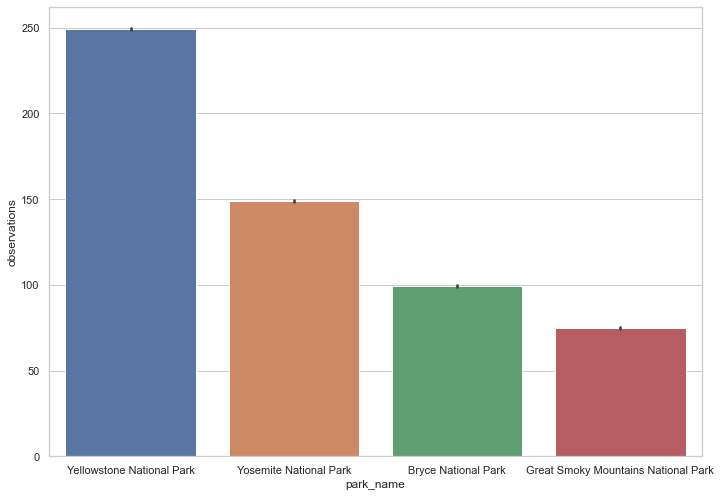

In [17]:
sns.barplot(data = df_plants, x='park_name', y='observations', palette = 'deep', 
            order = ['Yellowstone National Park','Yosemite National Park', 'Bryce National Park', 'Great Smoky Mountains National Park'])
plt.show()
plt.show()

In [43]:
df_plants_yellowstone = df_plants[df_plants.park_name == "Yellowstone National Park"].sort_values(by="observations",ascending = False)
df_plants_yellowstone.head()

,scientific_name,park_name,observations,category,common_names,conservation_status
11629,Lycopodium tristachyum,Yellowstone National Park,321,Vascular Plant,"Deep-Root Clubmoss, Ground Cedar",NaN
5512,Castilleja miniata,Yellowstone National Park,317,Vascular Plant,"Giant Red Indian Paintbrush, Great Red Indian ...",NaN
22240,Dracocephalum parviflorum,Yellowstone National Park,316,Vascular Plant,American Dragonhead,NaN
3375,Cryptantha fendleri,Yellowstone National Park,316,Vascular Plant,"Fendler's Cryptantha, Sanddune Catseye, Sanddu...",NaN
20347,Bidens tripartita,Yellowstone National Park,314,Vascular Plant,"Threelobe Beggarticks, Three-Lobe Beggarticks",NaN


In [44]:
df_plants_yosemite = df_plants[df_plants.park_name == "Yosemite National Park"].sort_values(by="observations",ascending = False)
df_plants_yosemite.head()

,scientific_name,park_name,observations,category,common_names,conservation_status
14193,Ivesia shockleyi var. shockleyi,Yosemite National Park,223,Vascular Plant,"Shockley's Ivesia, Sky Mousetail",NaN
16978,Lipocarpha micrantha,Yosemite National Park,222,Vascular Plant,"Dwarf Bulrush, Smallflower Halfchaff Sedge, Sm...",NaN
7308,Trillium rugelii,Yosemite National Park,219,Vascular Plant,Southern Nodding Trillium,NaN
17739,Artemisia arbuscula ssp. arbuscula,Yosemite National Park,219,Vascular Plant,"Gray Low Sagebrush, Little Sagebrush",NaN
10267,Castilleja pallescens,Yosemite National Park,214,Vascular Plant,"Pale Indian Paintbrush, Pale Paintbrush",NaN


In [45]:
df_plants_bryce = df_plants[df_plants.park_name == "Bryce National Park"].sort_values(by="observations",ascending = False)
df_plants_bryce.head()

,scientific_name,park_name,observations,category,common_names,conservation_status
17121,Valerianella radiata,Bryce National Park,176,Vascular Plant,"Beaked Corn-Salad, Corn Salad",NaN
16155,Melilotus indica,Bryce National Park,173,Vascular Plant,Sourclover,NaN
23525,Ericameria bloomeri,Bryce National Park,172,Vascular Plant,"Bloomer's Goldenbush, Rabbitbush",NaN
1737,Draba oligosperma,Bryce National Park,167,Vascular Plant,"Fewseed Draba, Glacier Draba",NaN
12940,Avena sativa,Bryce National Park,163,Vascular Plant,"Cultivated Oat, Oats",NaN


In [47]:
df_plants_gsm = df_plants[df_plants.park_name == "Great Smoky Mountains National Park"].sort_values(by="observations",ascending = False)
df_plants_gsm.head()

,scientific_name,park_name,observations,category,common_names,conservation_status
22356,Sonchus asper ssp. asper,Great Smoky Mountains National Park,147,Vascular Plant,Spiny Sowthistle,NaN
17522,Lespedeza violacea,Great Smoky Mountains National Park,146,Vascular Plant,Violet Bush-Clover,NaN
15647,Botrychium dissectum,Great Smoky Mountains National Park,144,Vascular Plant,"Cutleaf Grape-Fern, Cut-Leaved Grape Fern",NaN
9354,Festuca subulata,Great Smoky Mountains National Park,141,Vascular Plant,"Bearded Fescue, Nodding Fescue",NaN
24495,Castilleja cusickii,Great Smoky Mountains National Park,135,Vascular Plant,"Cusick's Indian Paintbrush, Cusick's Paintbrush",NaN
